In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("D:\\crypto\\coin_Bitcoin.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [9]:
print(df.isna().sum())
df.head()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [11]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


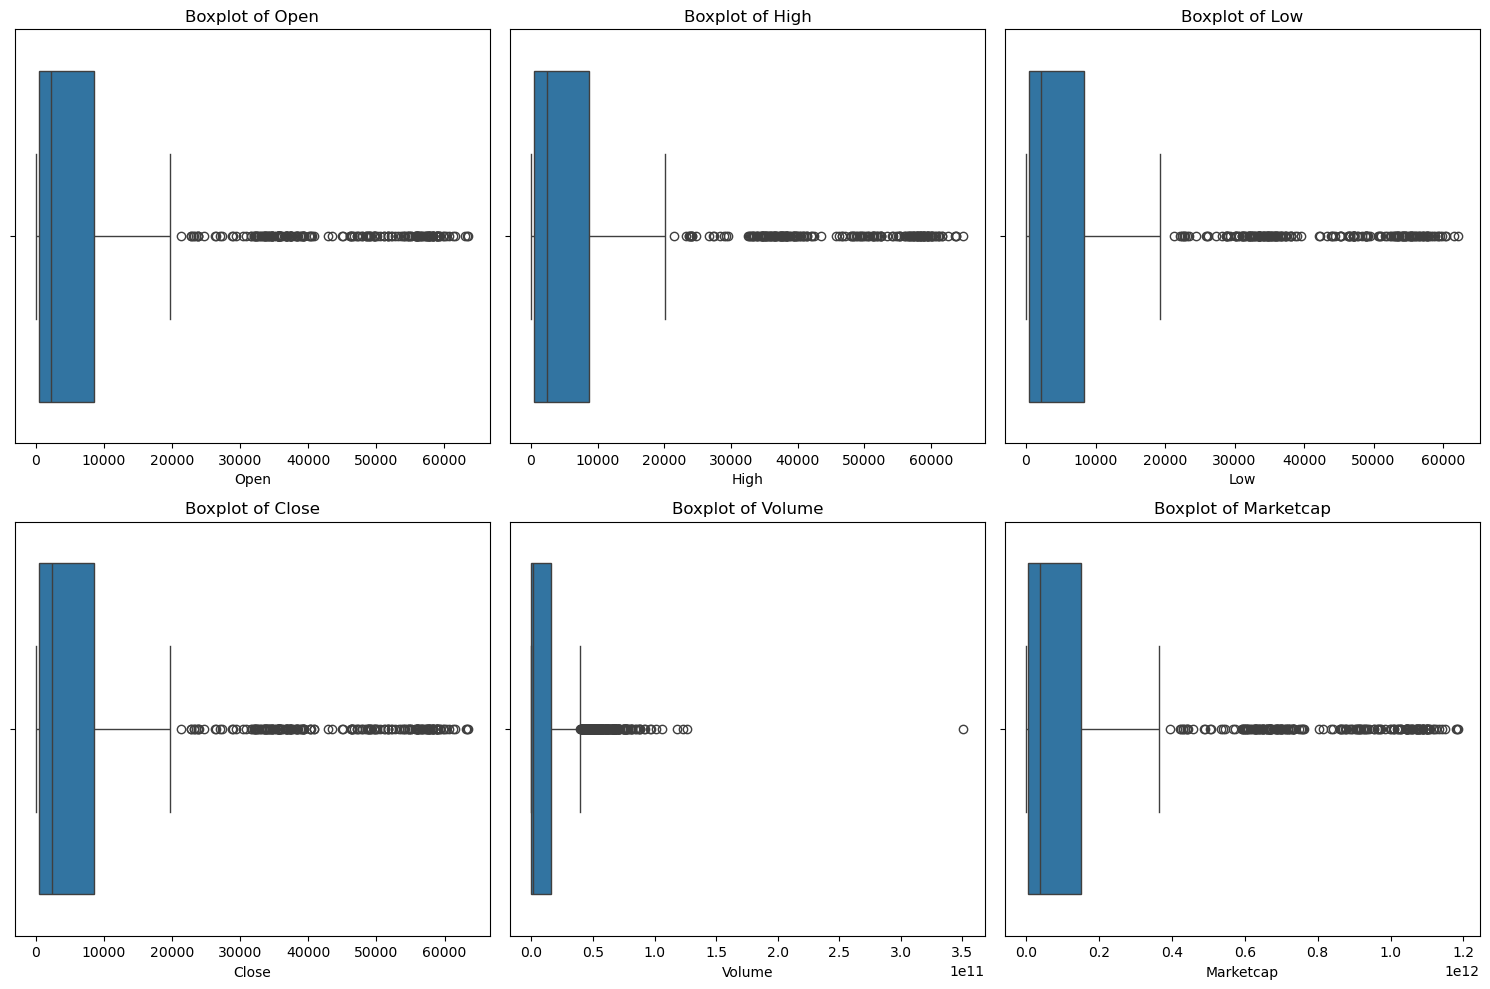

In [13]:

# List of columns to plot boxplots for (excluding 'Unnamed: 0')
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Volume', 'Marketcap']

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Create a grid of 2 rows and 3 columns
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [14]:

# Calculate Q1, Q3, and IQR for the columns of interest
Q1 = df[['Volume', 'Marketcap']].quantile(0.25)
Q3 = df[['Volume', 'Marketcap']].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[~((df[['Volume', 'Marketcap']] < lower_bound) | 
                       (df[['Volume', 'Marketcap']] > upper_bound)).any(axis=1)]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (2991, 10)
DataFrame shape after removing outliers: (2696, 10)


In [15]:
features = ['SNo','Name','Date','High','Low','Close','Volume']
target = 'Marketcap'

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + [target])
Q1 = df_filtered[target].quantile(0.25)
Q3 = df_filtered[target].quantile(0.75)
IQR = Q3 - Q1

# Define the acceptable range for price_usd
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered_no_price_outliers = df_filtered[(df_filtered[target] >= lower_bound) & (df_filtered[target] <= upper_bound)]

# Check how many rows remain after outlier removal
print(f"Rows before outlier removal: {df_filtered.shape[0]}")
print(f"Rows after removing bitcoin outliers: {df_filtered_no_price_outliers.shape[0]}")


Rows before outlier removal: 2991
Rows after removing bitcoin outliers: 2788


In [16]:
import pandas as pd
from scipy import stats
import numpy as np

# List of numeric columns you want to calculate Z-scores for
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Convert relevant columns to numeric just in case there are any unexpected data types
df_filtered[features] = df_filtered[features].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any) after conversion
df_filtered = df_filtered.dropna(subset=features)

# Calculate Z-scores for the selected features
z_scores = np.abs(stats.zscore(df_filtered[features]))

# Keep only rows where all Z-scores are less than 3 (removing outliers)
df_filtered_no_outliers = df_filtered[(z_scores < 3).all(axis=1)]

# Print the number of remaining rows after removing outliers
print(f"Remaining rows after removing outliers: {len(df_filtered_no_outliers)}")

# Optionally, inspect the cleaned data
print(df_filtered_no_outliers.head())


Remaining rows after removing outliers: 2865
   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


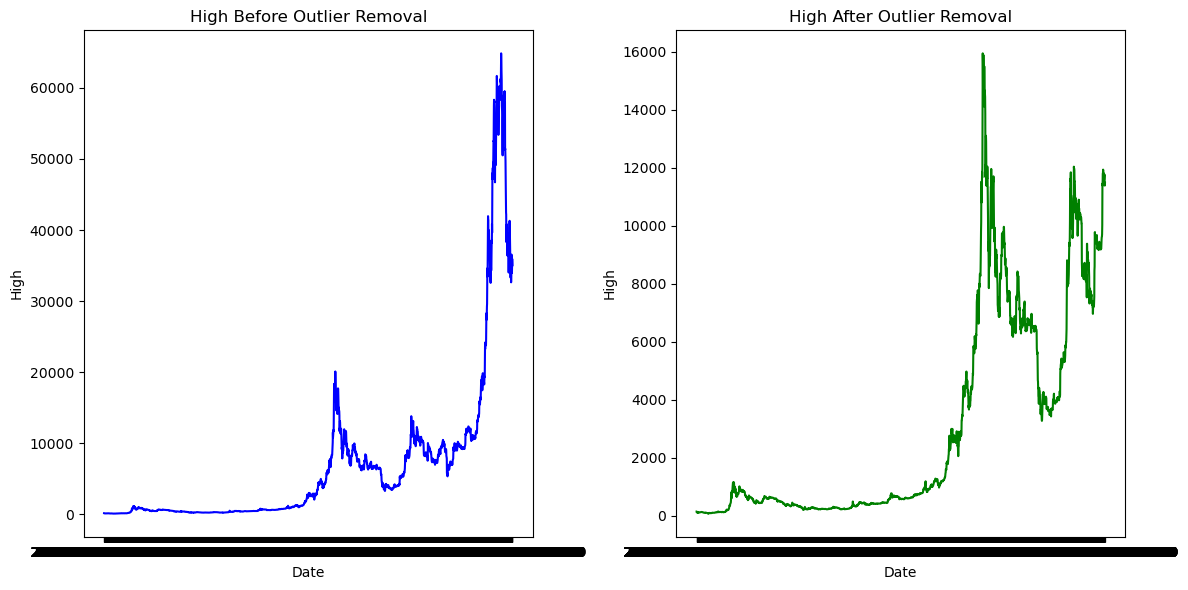

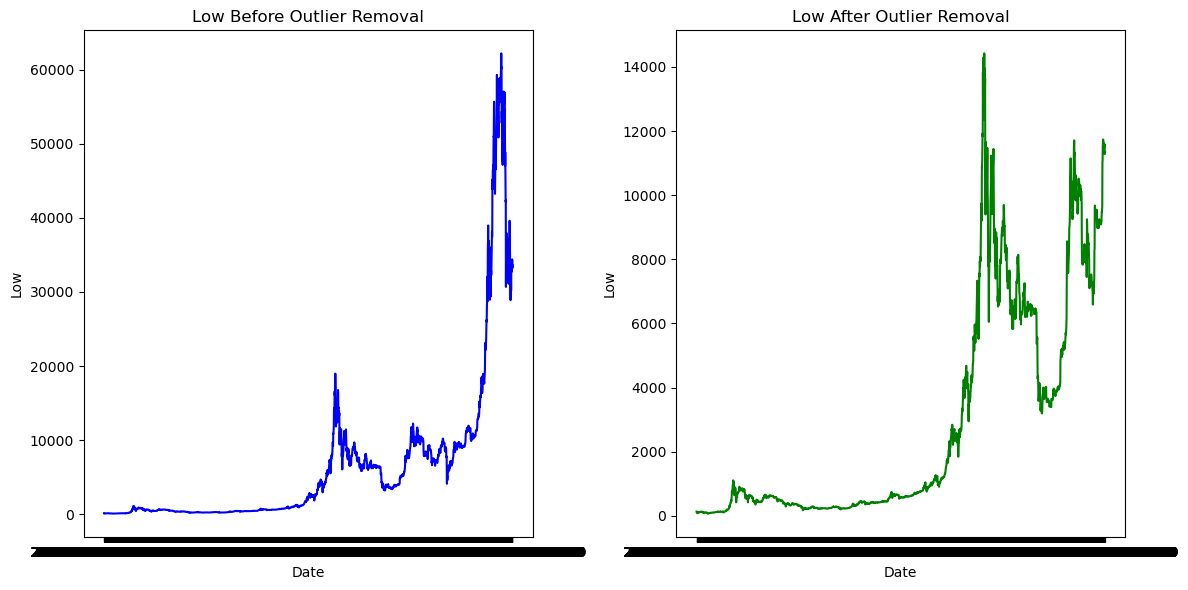

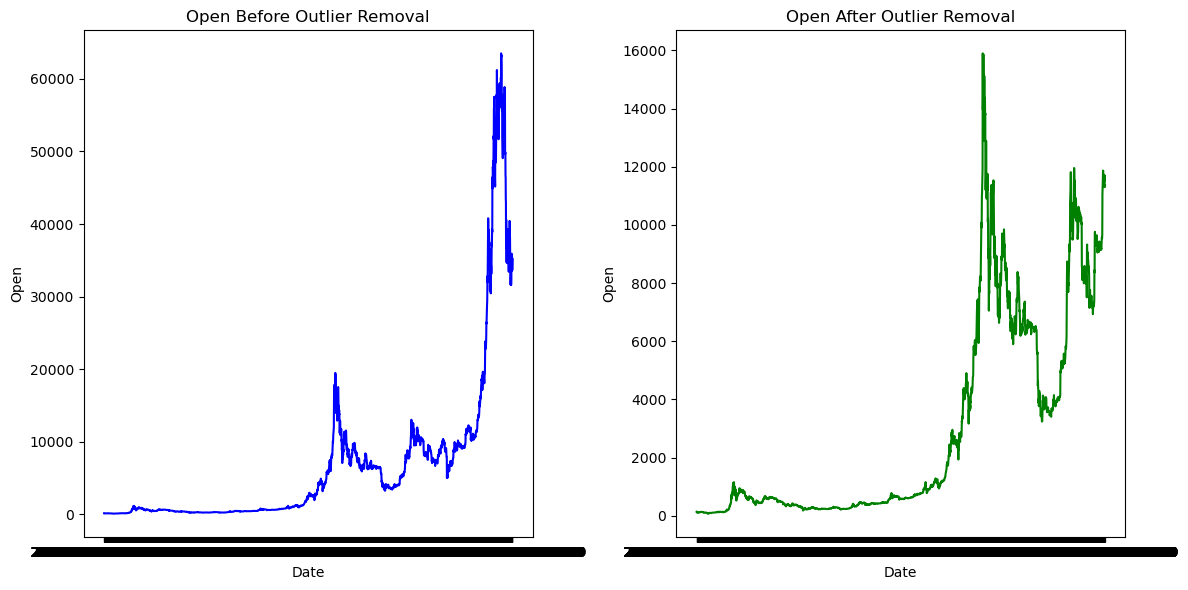

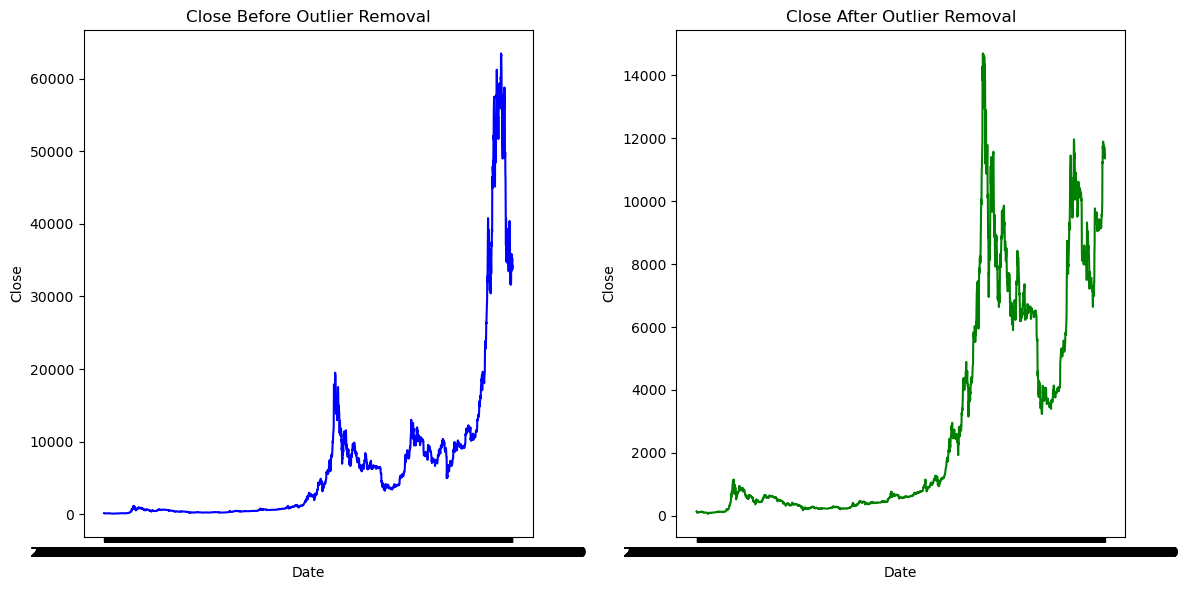

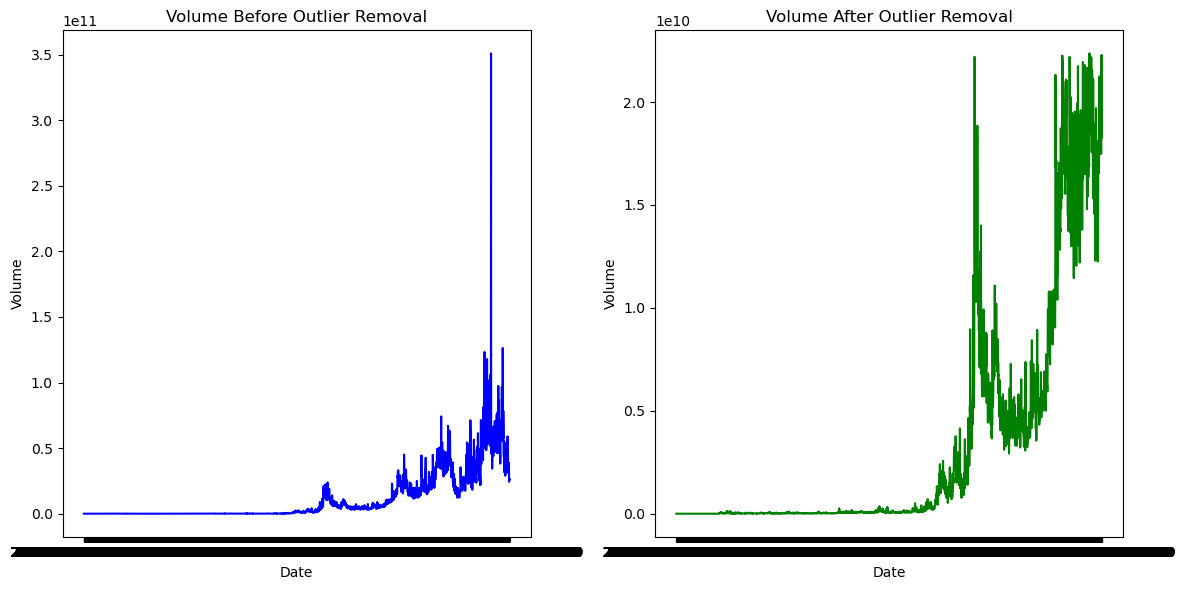

In [ ]:
# List of columns to apply the IQR method
columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Function to remove outliers using IQR for multiple columns
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the data for each column
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply the outlier removal function
df_filtered = remove_outliers_iqr(df, columns)

# Plot the data before and after outlier removal
def plot_data_before_after(df_original, df_filtered, column):
    plt.figure(figsize=(12, 6))
    
    # Original data
    plt.subplot(1, 2, 1)
    plt.plot(df_original['Date'], df_original[column], 'b-', label='Original Data')
    plt.title(f'{column} Before Outlier Removal')
    plt.xlabel('Date')
    plt.ylabel(column)
    
    # Filtered data
    plt.subplot(1, 2, 2)
    plt.plot(df_filtered['Date'], df_filtered[column], 'g-', label='Filtered Data')
    plt.title(f'{column} After Outlier Removal')
    plt.xlabel('Date')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

# Plot graphs for each column before and after outlier removal
for col in columns:
    plot_data_before_after(df, df_filtered, col)


In [ ]:
# heat map
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_filtered_no_outliers[features + [target]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Price')
plt.show()

In [ ]:
# liner reggression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract features and target
#X = df_filtered_no_outliers[features]
#y = df_filtered_no_outliers[target]
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
target = 'Close'  # Adjust the target column to your actual target variable
X = features
y = target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

plt.figure(figsize=(18,10))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()